In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('diabetes_two.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [70]:
df.isnull().sum()

Age                   1
Gender                1
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              1
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [71]:
mod = df['Gender'].mode()[0]
df['Age'] = df['Age'].fillna(df['Age'].median())
df["Gender"] = df["Gender"].fillna(mod)
df['weakness'] = df['weakness'].fillna(df['weakness'].mode()[0])


In [72]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [80]:
cat_col = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity','class']

In [74]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [75]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
le = LabelEncoder()

In [81]:
for col in cat_col:
    df[col] = le.fit_transform(df[col])
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,48.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,600.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48.0,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58.0,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32.0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [82]:
x = df.drop(columns='class')
y = df['class']

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=.2, random_state=42)

In [84]:
x_train.shape

(416, 16)

In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[0.09589041, 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04109589, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07020548, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08561644, 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.05136986, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.0239726 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(104, 16))

In [89]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', tol= 0.0001, solver='liblinear', max_iter=100, multi_class='auto')


In [90]:
model.fit(x_train, y_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto', solver='liblinear')

In [91]:
y_pred = model.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [93]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)
AUC = roc_auc_score(y_test,y_pred)

In [94]:
accuracy

0.9326923076923077

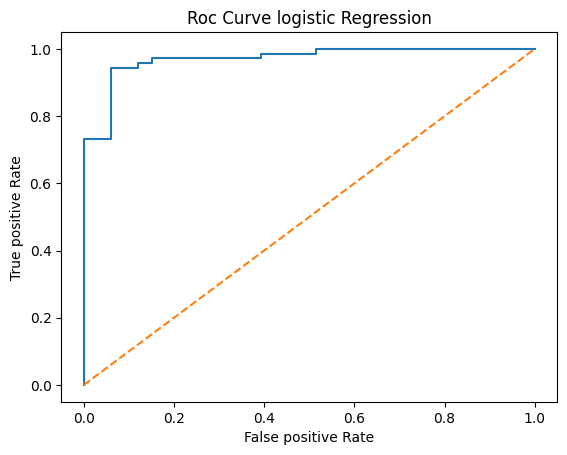

In [96]:
roc_score = model.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, roc_score)

plt.plot(fpr, tpr)
plt.plot([0,1], ls='--')
plt.title("Roc Curve logistic Regression")
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()
